In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
f=open(r'C:\Users\zhang\Desktop\bank_data.csv')
df=pd.read_csv(f)
des1=df.info()
print(des1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


首先对数据集总体情况进行了解

In [2]:
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


其次，查看数据前十行

In [3]:
lost=df.isnull().any()
print(lost)

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool


查看缺失数据

In [4]:
des2=df.describe()
print(des2)

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


查看整体数据描述

In [5]:
corr1=df["age"].corr(df["balance"])
print(corr)

NameError: name 'corr' is not defined

计算年龄和余额的相关性

In [ ]:
loan1=df.loan
loan=np.array(loan1)
loan[loan=="no"]=1
loan[loan=="yes"]=0
df['loan_new']=loan
print(df["loan_new"])

In [ ]:
print('spearman', df['loan_new'].corr(df['age'], method='spearman'))

将是否贷款转化为01变量，从而计算贷款和年龄的相关系数

In [6]:
sort=df.groupby('education')['balance'].mean().sort_values(ascending=False)
print(sort)

education
tertiary     1845.869070
unknown      1746.605634
primary      1523.031333
secondary    1296.480278
Name: balance, dtype: float64


可以看出接受过高等教育客户的账户平均资产最高，但受过初等教育客户的平均资产高于中等教育客户。

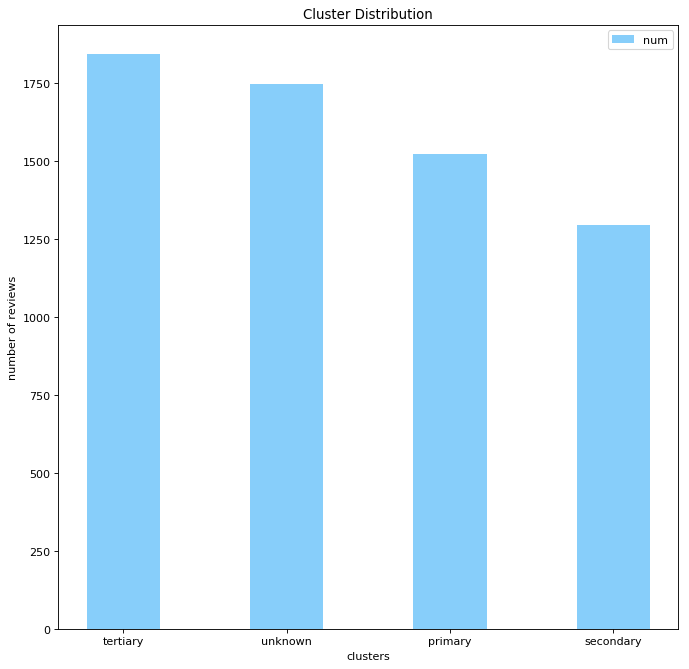

In [10]:
# 创建一个点数为 8 x 6 的窗口, 并设置分辨率为 80像素/每英寸
plt.figure(figsize=(10, 10), dpi=80)
# 再创建一个规格为 1 x 1 的子图
# plt.subplot(1, 1, 1)
# 柱子总数
N = 4
# 包含每个柱子对应值的序列
values = (1845,1746,1523,1296)
# 包含每个柱子下标的序列
index = np.arange(N)
# 柱子的宽度
width = 0.45
# 绘制柱状图, 每根柱子的颜色为紫罗兰色
p2 = plt.bar(index, values, width, label="num", color="#87CEFA")
# 设置横轴标签
plt.xlabel('clusters')
# 设置纵轴标签
plt.ylabel('number of reviews')
# 添加标题
plt.title('Cluster Distribution')
# 添加纵横轴的刻度
plt.xticks(index, ('tertiary', 'unknown', 'primary', 'secondary'))
# plt.yticks(np.arange(0, 10000, 10))
# 添加图例
plt.legend(loc="upper right")
plt.show()

根据上一步聚合结果绘制柱状图，更加直观看出分类情况